In [1]:
import nltk
import numpy as np
nltk.download('cmudict')
#^run this line once when implementing 
entries = nltk.corpus.cmudict.entries()

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\rober\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [2]:
dictionary = nltk.corpus.cmudict.dict()

In [84]:
words = []
lengths = []
for index, entry in enumerate(entries):
    if len(dictionary[entry[0]]) > 1:
        words.append(entry[0])
    lengths.append(len(dictionary[entry[0]]))

In [85]:
words = list(set(words))

In [86]:
confuse = []
for word in words:
    if len(dictionary[word]) > 4:
        confuse.append(word)

In [87]:
print(len(confuse))

2


In [88]:
print(dictionary[confuse[0]])

[['F', 'EH1', 'B', 'Y', 'AH0', 'W', 'EH2', 'R', 'IY0', 'Z'], ['F', 'EH1', 'B', 'AH0', 'W', 'EH2', 'R', 'IY0', 'Z'], ['F', 'EH1', 'B', 'R', 'UW0', 'W', 'EH2', 'R', 'IY0', 'Z'], ['F', 'EH1', 'B', 'UW0', 'W', 'EH2', 'R', 'IY0', 'Z'], ['F', 'EH1', 'B', 'Y', 'UW0', 'W', 'EH2', 'R', 'IY0', 'Z']]


In [89]:
print(confuse)

["february's", 'february']


In [90]:
print(dictionary[confuse[1]])

[['F', 'EH1', 'B', 'Y', 'AH0', 'W', 'EH2', 'R', 'IY0'], ['F', 'EH1', 'B', 'AH0', 'W', 'EH2', 'R', 'IY0'], ['F', 'EH1', 'B', 'R', 'UW0', 'W', 'EH2', 'R', 'IY0'], ['F', 'EH1', 'B', 'UW0', 'W', 'EH2', 'R', 'IY0'], ['F', 'EH1', 'B', 'Y', 'UW0', 'W', 'EH2', 'R', 'IY0']]


In [91]:
print(np.mean(lengths))

1.1725924762780682


In [92]:
from matplotlib import pyplot as plt

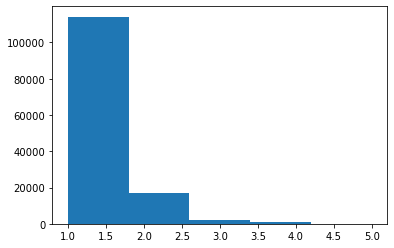

In [93]:
plt.hist(lengths, bins = 5)
plt.show()

In [95]:
list4 = []
for word in words:
    if len(dictionary[word]) == 2:
        list1 = dictionary[word][0]
        list2 = dictionary[word][1]
        common = list(set(list1).intersection(list2))
        list3 = list1 + list2
        list4 += [x for x in list3 if x not in common]

In [96]:
import pandas as pd

In [97]:
df = pd.value_counts(np.array(list4))

In [98]:
df

AH0    2361
IH0    1956
IY0     823
AA1     658
AE1     624
       ... 
UH2      13
M         9
OY2       6
OY0       5
UW        1
Length: 70, dtype: int64

In [99]:
changed = df.index.values

In [100]:
stats = []
for i in range(len(changed)):
    counter = 0
    for index, entry in enumerate(entries):
        counter += entry[1].count(changed[i])
    stats.append(counter)

In [101]:
print(stats)

[63574, 31627, 22610, 16769, 16811, 23978, 20800, 10118, 9234, 48549, 9319, 46046, 15602, 5171, 6818, 8031, 50427, 27842, 2880, 8554, 8359, 1776, 1242, 6607, 3304, 3253, 3061, 4716, 1721, 4960, 3272, 6822, 4548, 8700, 2050, 3718, 8864, 983, 2864, 2375, 6404, 42502, 1490, 1769, 32389, 13553, 1583, 49479, 2134, 10742, 19715, 60564, 2902, 1078, 13748, 1014, 560, 576, 9865, 244, 378, 501, 944, 655, 21057, 446, 29347, 194, 129, 1]


In [153]:
A = np.array([i / j for i, j in zip(df.values, stats)])

In [141]:
B = [round(100*i,4) for i in A]
print(B)

[3.7138, 6.1846, 3.64, 3.9239, 3.7119, 2.3813, 2.7163, 5.3864, 5.3173, 1.0072, 5.1937, 1.0033, 2.583, 6.227, 4.2974, 3.5612, 0.5334, 0.8836, 7.9514, 2.5719, 2.5601, 11.3176, 15.1369, 2.8152, 5.4479, 5.0415, 5.2924, 3.3927, 8.9483, 3.1048, 4.6149, 2.1695, 3.0343, 1.5862, 6.6341, 3.362, 1.4102, 11.6989, 3.9455, 4.4211, 1.624, 0.2423, 6.3087, 4.8615, 0.2655, 0.5681, 4.5483, 0.1233, 2.671, 0.4375, 0.2384, 0.076, 1.4473, 3.8033, 0.291, 3.6489, 5.5357, 4.6875, 0.2636, 10.2459, 6.0847, 4.3912, 1.9068, 2.5954, 0.0617, 2.9148, 0.0307, 3.0928, 3.876, 100.0]


In [156]:
B = list(A[np.argsort(A)])
B = [round(100*i,4) for i in B]
print(B)

[0.0307, 0.0617, 0.076, 0.1233, 0.2384, 0.2423, 0.2636, 0.2655, 0.291, 0.4375, 0.5334, 0.5681, 0.8836, 1.0033, 1.0072, 1.4102, 1.4473, 1.5862, 1.624, 1.9068, 2.1695, 2.3813, 2.5601, 2.5719, 2.583, 2.5954, 2.671, 2.7163, 2.8152, 2.9148, 3.0343, 3.0928, 3.1048, 3.362, 3.3927, 3.5612, 3.64, 3.6489, 3.7119, 3.7138, 3.8033, 3.876, 3.9239, 3.9455, 4.2974, 4.3912, 4.4211, 4.5483, 4.6149, 4.6875, 4.8615, 5.0415, 5.1937, 5.2924, 5.3173, 5.3864, 5.4479, 5.5357, 6.0847, 6.1846, 6.227, 6.3087, 6.6341, 7.9514, 8.9483, 10.2459, 11.3176, 11.6989, 15.1369, 100.0]


In [159]:
C = df.index[np.argsort(A)].values

In [161]:
for i in range(len(B)):
    print(C[i], "can be pronounced differently in ", B[i], "% of times where it occurs")

M can be pronounced differently in  0.0307 % of times where it occurs
B can be pronounced differently in  0.0617 % of times where it occurs
N can be pronounced differently in  0.076 % of times where it occurs
L can be pronounced differently in  0.1233 % of times where it occurs
P can be pronounced differently in  0.2384 % of times where it occurs
K can be pronounced differently in  0.2423 % of times where it occurs
NG can be pronounced differently in  0.2636 % of times where it occurs
D can be pronounced differently in  0.2655 % of times where it occurs
F can be pronounced differently in  0.291 % of times where it occurs
V can be pronounced differently in  0.4375 % of times where it occurs
S can be pronounced differently in  0.5334 % of times where it occurs
G can be pronounced differently in  0.5681 % of times where it occurs
Z can be pronounced differently in  0.8836 % of times where it occurs
R can be pronounced differently in  1.0033 % of times where it occurs
T can be pronounced d

In [162]:
for i in range(len(df.index.values)):
    print(df.index.values[i], "was changed ", df.values[i], " times")

AH0 was changed  2361  times
IH0 was changed  1956  times
IY0 was changed  823  times
AA1 was changed  658  times
AE1 was changed  624  times
ER0 was changed  571  times
EH1 was changed  565  times
IY1 was changed  545  times
EY1 was changed  491  times
T was changed  489  times
HH was changed  484  times
R was changed  462  times
IH1 was changed  403  times
Y was changed  322  times
AY1 was changed  293  times
AO1 was changed  286  times
S was changed  269  times
Z was changed  246  times
EH0 was changed  229  times
OW1 was changed  220  times
OW0 was changed  214  times
IY2 was changed  201  times
AY0 was changed  188  times
UW1 was changed  186  times
EY2 was changed  180  times
AY2 was changed  164  times
AA2 was changed  162  times
AA0 was changed  160  times
AE0 was changed  154  times
CH was changed  154  times
AE2 was changed  151  times
AH1 was changed  148  times
ER1 was changed  138  times
SH was changed  138  times
UW0 was changed  136  times
EH2 was changed  125  times
W w

In [163]:
print(len(words))

9241


In [164]:
print(dictionary['juanita'])

[['W', 'AA0', 'N', 'IY1', 'T', 'AH0'], ['JH', 'UW', 'AH0', 'N', 'IY1', 'T', 'AH0']]


In [3]:
print(dictionary['february'])

[['F', 'EH1', 'B', 'Y', 'AH0', 'W', 'EH2', 'R', 'IY0'], ['F', 'EH1', 'B', 'AH0', 'W', 'EH2', 'R', 'IY0'], ['F', 'EH1', 'B', 'R', 'UW0', 'W', 'EH2', 'R', 'IY0'], ['F', 'EH1', 'B', 'UW0', 'W', 'EH2', 'R', 'IY0'], ['F', 'EH1', 'B', 'Y', 'UW0', 'W', 'EH2', 'R', 'IY0']]
